<a href="https://colab.research.google.com/github/Suphattha/data_viz/blob/main/DataViz_Midterm_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ข้อสอบจำนวน 1 ข้อ คะแนน 150/100 (45% / 30% ของคะแนนทั้งหมด)

จุดมุ่งหมาย: ตัดเกรดรายวิชา Project จากข้อกำหนดต่อไปนี้


1. คะแนนประกอบด้วย 3 ส่วน

* คำแนนในห้องเรียน 10% (จากไฟล์ Project1-StuList-1-63-ตัดเกรด_renamed.xlsx)
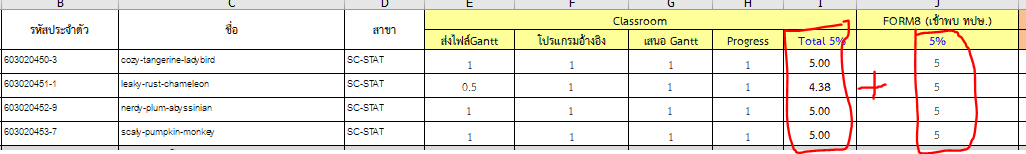

* คะแนนอาจารย์ที่ปรึกษา 30% (จากไฟล์ คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx)

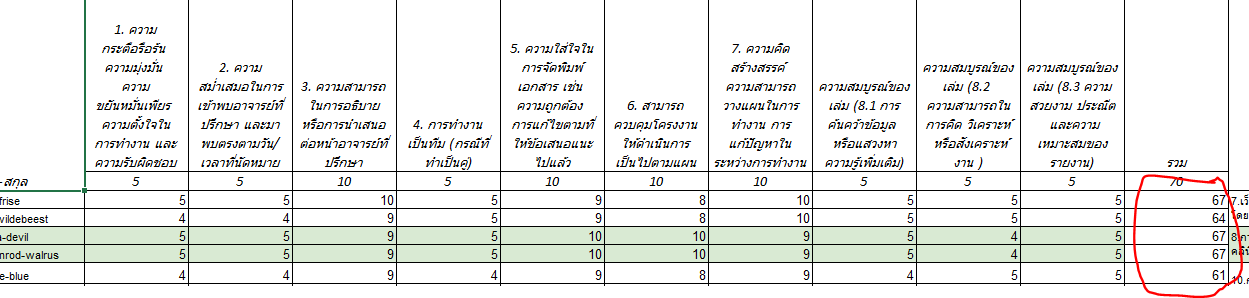

* คะแนนจากกรรมการในห้อง 60% (จากไฟล์ คะแนนสอบปากเปล่าของกรรมการสอบ_renamed.xlsx) ***(คะแนนมาจากกรรมการท่านละ 30%)***

   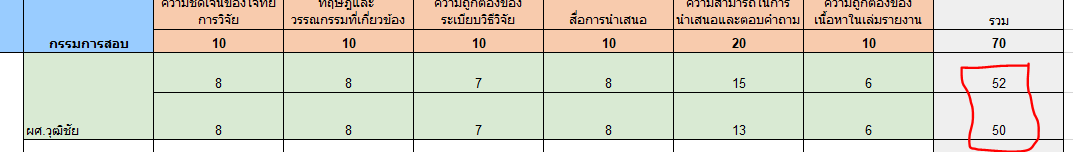

   ดาวน์โหลดไฟล์คะแนนทั้งหมดจาก https://drive.google.com/drive/folders/18LdS093tjLWbfrH1DV-8fM70hI0dOjh8?usp=sharing

2. โดยคะแนนจากกรรมการในห้องจะประกอบไปด้วยคะแนนจากกรรมการ 2 ท่าน และเพื่อความยุติธรรมเนื่องจากอาจารย์แต่ละท่านมีเกณฑ์ในการให้คะแนนแตกต่างกัน คะแนนจากกรรมการในห้องจะถูกปรับน้ำหนักให้มีความยุติธรรมตามวิธีดังนี้

    1. ปรับ Z-score ของคะแนนของกรรมการสอบแต่ละท่าน (ไฟล์ คะแนนสอบปากเปล่าของกรรมการสอบ_renamed.xlsx)
    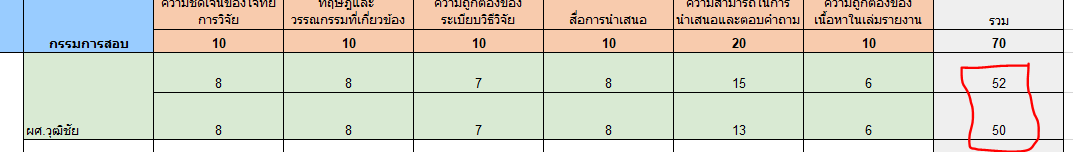
    2. นำ Z-score จากข้อ 1. มาเข้าสูตร

$adjusted\_score = 30 + \frac{-15\times(z\_score-2.3103448275862064)}{-4.788052880847054}$

(หรือใช้ function ```cal_adjusted_score()``` ข้างล่าง)

3. รวมคะแนนและตัดเกรดแบบ อิงเกณฑ์ <50 ได้ F ... >= 80 ได้ A
***ข้อ 1-3 คะแนนรวม 120 คะแนน (ดึงข้อมูลและรวมข้อมูล 40  ปรับน้ำหนักคะแนน 40  ตัดเกรด 40)***
4. วาดกราฟ pararel coordinate ของผลคะแนนโดยแยกสีด้วยชื่ออาจารย์ที่ปรึกษา

ตัวอย่าง 
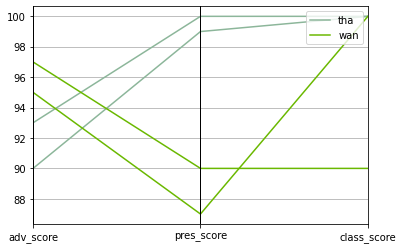

***ข้อ 4 30 คะแนน***


# ตัวอย่าง code บางส่วน ที่อาจจะมีประโยชน์กับการทำข้อสอบ

In [ ]:
import pandas as pd

In [ ]:
day0 = pd.read_excel('/content/คะแนนสอบปากเปล่าของกรรมการสอบ_renamed.xlsx',sheet_name=0,skiprows=1)
day0.head()

,ห้องสอบ,เวลา,ชื่อเรื่อง,นักศึกษา,อาจารย์,กรรมการสอบ,ความชัดเจนของโจทย์การวิจัย,ความครอบคลุมของทฤษฎีและ วรรณกรรมที่เกี่ยวข้อง,ความถูกต้องของระเบียบวิธีวิจัย,สื่อการนำเสนอ,ความสามารถในการนำเสนอและตอบคำถาม,ความถูกต้องของเนื้อหาในเล่มรายงาน,รวม
0,NaN,NaN,NaN,NaN,ที่ปรึกษา,NaN,10,10,10,10,20,10,70
1,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,leaky-rust-chameleon,ดร.ธิปไตย,ผศ.วุฒิชัย,8,8,7,8,15,6,52
2,NaN,NaN,NaN,greasy-ruby-bombay,NaN,NaN,8,8,7,8,13,6,50
3,NaN,NaN,NaN,leaky-rust-chameleon,NaN,อ.ยุภาพร,9,8,8,9,18,8,60
4,NaN,NaN,NaN,greasy-ruby-bombay,NaN,NaN,9,8,8,9,16,8,58


In [ ]:
day0_1 = day0.fillna(method='ffill')
day0_1.head()

,ห้องสอบ,เวลา,ชื่อเรื่อง,นักศึกษา,อาจารย์,กรรมการสอบ,ความชัดเจนของโจทย์การวิจัย,ความครอบคลุมของทฤษฎีและ วรรณกรรมที่เกี่ยวข้อง,ความถูกต้องของระเบียบวิธีวิจัย,สื่อการนำเสนอ,ความสามารถในการนำเสนอและตอบคำถาม,ความถูกต้องของเนื้อหาในเล่มรายงาน,รวม
0,NaN,NaN,NaN,NaN,ที่ปรึกษา,NaN,10,10,10,10,20,10,70
1,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,leaky-rust-chameleon,ดร.ธิปไตย,ผศ.วุฒิชัย,8,8,7,8,15,6,52
2,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,greasy-ruby-bombay,ดร.ธิปไตย,ผศ.วุฒิชัย,8,8,7,8,13,6,50
3,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,leaky-rust-chameleon,ดร.ธิปไตย,อ.ยุภาพร,9,8,8,9,18,8,60
4,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,greasy-ruby-bombay,ดร.ธิปไตย,อ.ยุภาพร,9,8,8,9,16,8,58


In [ ]:
all_aj_list = set(list(day0_1['กรรมการสอบ'].dropna()))
all_aj_list

{'ดร.ธนพงศ์',
 'ดร.ธิปไตย',
 'ดร.พลากร',
 'ดร.วรรณพร',
 'ดร.อุทุมพร',
 'ผศ.วุฒิชัย',
 'ผศ.สุกัญญา',
 'รศ.วิชุดา',
 'อ.ธรรณญพร',
 'อ.ยุภาพร'}

In [ ]:
advisor = pd.read_excel('/content/คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx',sheet_name='ดร.ธนพงศ์',skiprows=1)
advisor.head()

,Unnamed: 0,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่นเพียร ความตั้งใจในการทำงาน และความรับผิดชอบ,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และมาพบตรงตามวัน/เวลาที่นัดหมาย,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอาจารย์ที่ปรึกษา,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้อง การแก้ไขตามที่ให้ข้อเสนอแนะไปแล้ว,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงาน การแก้ปัญหาในระหว่างการทำงาน,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแสวงหาความรู้เพิ่มเติม),ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเคราะห์ หรือสังเคราะห์งาน ),ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และความเหมาะสมของรายงาน),รวม,Unnamed: 12
0,NaN,5,5,10,5,10,10,10,5,5,5,70,NaN
1,jumpy-apricot-frise,5,5,10,5,9,8,10,5,5,5,67,7.เว็บแอปพลิเคชันสำหรับการสร้างแบบจำลอง 3 มิติ...
2,boozy-thistle-wildebeest,4,4,9,5,9,8,10,5,5,5,64,NaN
3,hasty-magnolia-devil,5,5,9,5,10,10,9,5,4,5,67,8.การออกแบบและพัฒนาแชทบอทสำหรับการเรียนการสอนโ...
4,chummy-goldenrod-walrus,5,5,9,5,10,10,9,5,4,5,67,NaN


In [ ]:
def cal_adjusted_score(z_score):
    return round(30 + ((-15*(z_score-2.3103448275862064))/(-4.788052880847054)),2)

In [ ]:
d = [{'advisor':'tha','name':'skimpy-magenta-bombay','adv_score':90,'pres_score':99,'class_score':100},
     {'advisor':'tha','name':'flimsy-lemon-budgerigar','adv_score':93,'pres_score':100,'class_score':100},
     {'advisor':'wan','name':'randy-gamboge-blue','adv_score':95,'pres_score':87,'class_score':100},
     {'advisor':'wan','name':'chummy-goldenrod-walrus','adv_score':97,'pres_score':90,'class_score':90}]
this = pd.DataFrame(d)
this

,advisor,name,adv_score,pres_score,class_score
0,tha,skimpy-magenta-bombay,90,99,100
1,tha,flimsy-lemon-budgerigar,93,100,100
2,wan,randy-gamboge-blue,95,87,100
3,wan,chummy-goldenrod-walrus,97,90,90


In [ ]:
pd.plotting.parallel_coordinates(this,'advisor',cols=['adv_score','pres_score','class_score']);

##1. คะแนนประกอบด้วย 3 ส่วน

-คำแนนในห้องเรียน 10% (จากไฟล์ Project1-StuList-1-63-ตัดเกรด_renamed.xlsx)


In [11]:
import pandas as pd

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import os

path = '/content/drive/My Drive/Dataviz_midterm_2021'

In [14]:
project_file_path = os.path.join(path,'Project1-StuList-1-63-ตัดเกรด_renamed.xlsx') 
print(project_file_path)

/content/drive/My Drive/Dataviz_midterm_2021/Project1-StuList-1-63-ตัดเกรด_renamed.xlsx


In [15]:
a = path + '/Project1-StuList-1-63-ตัดเกรด_renamed.xlsx' 
print(a)

/content/drive/My Drive/Dataviz_midterm_2021/Project1-StuList-1-63-ตัดเกรด_renamed.xlsx


In [16]:
data_project = pd.read_excel(project_file_path)
data_project

,เลขที่,รหัสประจำตัว,ชื่อ,สาขา,Classroom,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,FORM8 (เข้าพบ ทปษ.),FORM6 (ทปษ.ประเมิน),Unnamed: 11,FORM7 รวมคะแนนสอบปากเปล่า,Unnamed: 13,Unnamed: 14,Unnamed: 15,TOTAL_SCORE,ROUND,Grade,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,NaN,NaN,NaN,NaN,ส่งไฟล์Gantt,โปรแกรมอ้างอิง,เสนอ Gantt,Progress,Total 5%,0.05,เต็ม 70,เก็บ 30%,กรรมการคนที่ 1,กรรมการคนที่ 2,เต็ม 140,เก็บ 60%,1.000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,603020450-3,cozy-tangerine-ladybird,SC-STAT,1,1,1,1,5,5,NaN,0,NaN,NaN,NaN,NaN,10.000,10.0,F,NaN,เกรด,คะแนน,NaN,จำนวน,ร้อยละ
2,2.0,603020451-1,leaky-rust-chameleon,SC-STAT,0.5,1,1,1,4.375,5,NaN,0,NaN,NaN,NaN,NaN,9.375,9.0,F,NaN,A,80,-100.0,0,0
3,3.0,603020452-9,nerdy-plum-abyssinian,SC-STAT,1,1,1,1,5,5,NaN,0,NaN,NaN,NaN,NaN,10.000,10.0,F,NaN,B+,75,-79.0,0,0
4,4.0,603020453-7,scaly-pumpkin-monkey,SC-STAT,1,1,1,1,5,5,NaN,0,NaN,NaN,NaN,NaN,10.000,10.0,F,NaN,B,70,-74.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,84.0,603021885-3,randy-mauve-ibis,SC-SI,1,0,1,1,3.75,4,NaN,0,NaN,NaN,NaN,NaN,7.750,8.0,F,NaN,NaN,NaN,NaN,NaN,NaN
85,85.0,603021886-1,messy-white-toucan,SC-SI,1,0,1,1,3.75,5,NaN,0,NaN,NaN,NaN,NaN,8.750,9.0,F,NaN,NaN,NaN,NaN,NaN,NaN
86,86.0,603021888-7,gummy-olivine-ibis,SC-SI,1,1,1,1,5,5,NaN,0,NaN,NaN,NaN,NaN,10.000,10.0,F,NaN,NaN,NaN,NaN,NaN,NaN
87,87.0,603021889-5,skanky-amaranth-ostrich,SC-SI,1,0,1,1,3.75,5,NaN,0,NaN,NaN,NaN,NaN,8.750,9.0,F,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
data_project.head()

,เลขที่,รหัสประจำตัว,ชื่อ,สาขา,Classroom,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,FORM8 (เข้าพบ ทปษ.),FORM6 (ทปษ.ประเมิน),Unnamed: 11,FORM7 รวมคะแนนสอบปากเปล่า,Unnamed: 13,Unnamed: 14,Unnamed: 15,TOTAL_SCORE,ROUND,Grade,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,NaN,NaN,NaN,NaN,ส่งไฟล์Gantt,โปรแกรมอ้างอิง,เสนอ Gantt,Progress,Total 5%,0.05,เต็ม 70,เก็บ 30%,กรรมการคนที่ 1,กรรมการคนที่ 2,เต็ม 140,เก็บ 60%,1.000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,603020450-3,cozy-tangerine-ladybird,SC-STAT,1,1,1,1,5,5,NaN,0,NaN,NaN,NaN,NaN,10.000,10.0,F,NaN,เกรด,คะแนน,NaN,จำนวน,ร้อยละ
2,2.0,603020451-1,leaky-rust-chameleon,SC-STAT,0.5,1,1,1,4.375,5,NaN,0,NaN,NaN,NaN,NaN,9.375,9.0,F,NaN,A,80,-100.0,0,0
3,3.0,603020452-9,nerdy-plum-abyssinian,SC-STAT,1,1,1,1,5,5,NaN,0,NaN,NaN,NaN,NaN,10.000,10.0,F,NaN,B+,75,-79.0,0,0
4,4.0,603020453-7,scaly-pumpkin-monkey,SC-STAT,1,1,1,1,5,5,NaN,0,NaN,NaN,NaN,NaN,10.000,10.0,F,NaN,B,70,-74.0,0,0


##นำcolumm มาบวกกัน 2 collumm คือ classroom 5% และ FORM8 (เข้าพบ ทปษ.) 5%ให้ได้เป็น Totel 10%

##คะแนนอาจารย์ที่ปรึกษา 30% (จากไฟล์ คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx)

In [18]:
คะแนนอาจารย์ที่ปรึกษา_renamed = os.path.join(path,'คะแนนอาจารย์ที่ปรึกษา_renamed.xlsx')

In [19]:
คะแนนอาจารย์ที่ปรึกษา_renamed_df = pd.read_excel(คะแนนอาจารย์ที่ปรึกษา_renamed)
คะแนนอาจารย์ที่ปรึกษา_renamed_df

,ชื่อ-สกุล,การประเมิน,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,ชื่อเรื่อง
0,NaN,1. ความกระตือรือร้น ความมุ่งมั่น ความขยันหมั่น...,2. ความสม่ำเสมอในการเข้าพบอาจารย์ที่ปรึกษา และ...,3. ความสามารถในการอธิบายหรือการนำเสนอต่อหน้าอา...,4. การทำงานเป็นทีม (กรณีที่ทำเป็นคู่),5. ความใส่ใจในการจัดพิมพ์เอกสาร เช่น ความถูกต้...,6. สามารถควบคุมโครงงานให้ดำเนินการเป็นไปตามแผน,7. ความคิดสร้างสรรค์ ความสามารถวางแผนในการทำงา...,ความสมบูรณ์ของเล่ม (8.1 การค้นคว้าข้อมูล หรือแ...,ความสมบูรณ์ของเล่ม (8.2 ความสามารถในการคิด วิเ...,ความสมบูรณ์ของเล่ม (8.3 ความสวยงาม ประณีต และค...,รวม,NaN
1,NaN,5,5,10,5,10,10,10,5,5,5,70,NaN
2,leaky-rust-chameleon,5,5,9,5,9,10,10,5,5,5,68,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...
3,greasy-ruby-bombay,4,5,7,5,8,10,9,4,5,4,61,NaN
4,wiggy-silver-drever,5,5,8,5,9,10,10,5,5,5,67,2.การศึกษาการทำประกันภัยพืชผลจากภัยแล้งโดยใช้ค...
5,stinky-red-chow,5,5,8,5,9,10,10,5,5,5,67,NaN
6,bumpy-indigo-dolphin,5,5,8,5,9,10,10,5,5,5,67,23.การศึกษาการทำประกันภัยพืชผลจากภัยแล้งโดยใช้...
7,randy-rust-lionfish,4,4,7,5,8,10,9,4,5,4,60,NaN
8,flaky-sepia-setter,5,5,9,5,10,10,10,5,5,5,69,32.ความเสี่ยงทางไซเบอร์ในองค์กรที่มีสาเหตุมาจา...
9,pasty-tomato-okapi,5,5,9,5,10,10,10,5,5,5,69,NaN


In [20]:
import pandas as pd
import os
from scipy import stats

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
path = '/content/drive/My Drive/Dataviz_midterm_2021'

##คะแนนจากกรรมการในห้อง 60% (จากไฟล์ คะแนนสอบปากเปล่าของกรรมการสอบ_renamed.xlsx) (คะแนนมาจากกรรมการท่านละ 30%)



In [28]:
 คะแนนสอบปากเปล่าของกรรมการสอบ_renamed= os.path.join(path,'คะแนนสอบปากเปล่าของกรรมการสอบ_renamed.xlsx')

In [31]:
คะแนนสอบปากเปล่าของกรรมการสอบ_renamed_df = pd.read_excel(คะแนนสอบปากเปล่าของกรรมการสอบ_renamed)
คะแนนสอบปากเปล่าของกรรมการสอบ_renamed_df

,วันจันทร์ที่ 7 ธันวาคม 2563,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,เกณฑ์การให้คะแนน,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,ห้องสอบ,เวลา,ชื่อเรื่อง,นักศึกษา,อาจารย์,กรรมการสอบ,ความชัดเจนของโจทย์การวิจัย,ความครอบคลุมของทฤษฎีและ วรรณกรรมที่เกี่ยวข้อง,ความถูกต้องของระเบียบวิธีวิจัย,สื่อการนำเสนอ,ความสามารถในการนำเสนอและตอบคำถาม,ความถูกต้องของเนื้อหาในเล่มรายงาน,รวม
1,NaN,NaN,NaN,NaN,ที่ปรึกษา,NaN,10,10,10,10,20,10,70
2,SC 6501,08:00 – 10.00 น.,1.การศึกษาแนวทางการประกันภัยพืชผลสำหรับมันสำปะ...,leaky-rust-chameleon,ดร.ธิปไตย,ผศ.วุฒิชัย,8,8,7,8,15,6,52
3,NaN,NaN,NaN,greasy-ruby-bombay,NaN,NaN,8,8,7,8,13,6,50
4,NaN,NaN,NaN,leaky-rust-chameleon,NaN,อ.ยุภาพร,9,8,8,9,18,8,60
5,NaN,NaN,NaN,greasy-ruby-bombay,NaN,NaN,9,8,8,9,16,8,58
6,NaN,10:00 – 12.00 น.,2.การศึกษาการทำประกันภัยพืชผลจากภัยแล้งโดยใช้ค...,wiggy-silver-drever,ดร.ธิปไตย,ผศ.วุฒิชัย,8,8,7,8,14,7,52
7,NaN,NaN,NaN,stinky-red-chow,NaN,NaN,8,8,7,8,14,7,52
8,NaN,NaN,NaN,wiggy-silver-drever,NaN,อ.ยุภาพร,7,7,7,7,13,7,48
9,NaN,NaN,NaN,stinky-red-chow,NaN,NaN,7,7,7,7,13,7,48


2. โดยคะแนนจากกรรมการในห้องจะประกอบไปด้วยคะแนนจากกรรมการ 2 ท่าน และเพื่อความยุติธรรมเนื่องจากอาจารย์แต่ละท่านมีเกณฑ์ในการให้คะแนนแตกต่างกัน คะแนนจากกรรมการในห้องจะถูกปรับน้ำหนักให้มีความยุติธรรมตามวิธีดังนี้

    1. ปรับ Z-score ของคะแนนของกรรมการสอบแต่ละท่าน (ไฟล์ คะแนนสอบปากเปล่าของกรรมการสอบ_renamed.xlsx)
    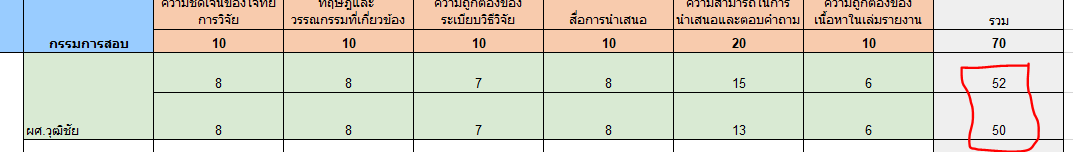
    2. นำ Z-score จากข้อ 1. มาเข้าสูตร

$adjusted\_score = 30 + \frac{-15\times(z\_score-2.3103448275862064)}{-4.788052880847054}$

(หรือใช้ function ```cal_adjusted_score()``` ข้างล่าง)



In [35]:
import pandas as pd

FileNotFoundError: ignored

In [ ]:
def cal_adjusted_score(z_score):
    return round(30 + ((-15*(z_score-2.3103448275862064))/(-4.788052880847054)),2)

3. รวมคะแนนและตัดเกรดแบบ อิงเกณฑ์ <50 ได้ F ... >= 80 ได้ A
***ข้อ 1-3 คะแนนรวม 120 คะแนน (ดึงข้อมูลและรวมข้อมูล 40  ปรับน้ำหนักคะแนน 40  ตัดเกรด 40)***
4. วาดกราฟ pararel coordinate ของผลคะแนนโดยแยกสีด้วยชื่ออาจารย์ที่ปรึกษา

ตัวอย่าง 
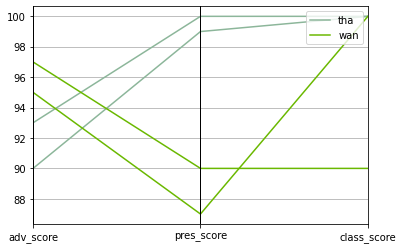

***ข้อ 4 30 คะแนน***

In [37]:
plt.scatter(table1['x'],table1['y'])

NameError: ignored